In [1]:
from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('ratings_train.txt',sep='\t')
train_df.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [7]:
train_df['label'].value_counts()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [8]:
import re
import numpy as np
train_df = train_df.fillna(' ')
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+"," ",x))

test_df = pd.read_csv('ratings_test.txt',sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+"," ",x))

train_df.drop('id',axis=1, inplace = True)
test_df.drop('id',axis=1, inplace = True)

In [10]:
from konlpy.tag import Okt
okt = Okt()
def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect = TfidfVectorizer(tokenizer = tw_tokenizer,ngram_range=(1,2),min_df=3,max_df=0.9)
tfidf_vect.fit(train_df['document'])
tridf_matrix_train = tfidf_vect.transform(train_df['document'])

In [18]:
tridf_matrix_train.shape

(150000, 129276)

In [21]:
lg_clf = LogisticRegression(random_state = 0, solver = 'liblinear')
params = {'C':[1,3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf,param_grid = params, cv=3,scoring = 'accuracy', verbose=1)
grid_cv.fit(tridf_matrix_train, train_df['label'])
print(grid_cv.best_params_,round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [23]:
from sklearn.metrics import accuracy_score
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])
best_estimator = grid_cv.best_estimator_
preds = best_estimator(tfidf_matrix_test)
print(accuracy_score(test_df['label'],preds))

TypeError: 'LogisticRegression' object is not callable

In [1]:
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd

mercari_df= pd.read_csv('mercari_train.tsv',sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [2]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

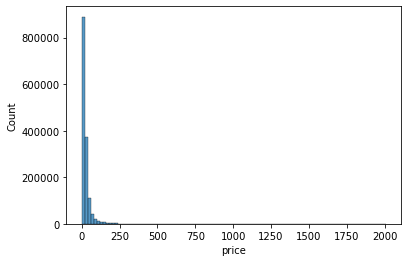

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_train_df = mercari_df['price']
plt.figure(figsize = (6,4))
sns.histplot(y_train_df,bins=100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

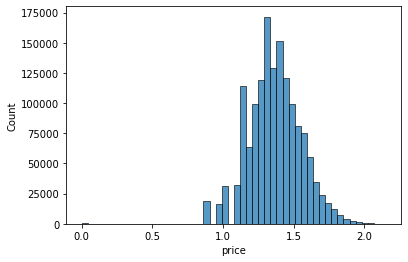

In [6]:
import numpy as np
y_train_df = np.log1p(y_train_df)
sns.histplot(y_train_df,bins=50)
plt.show

In [7]:
mercari_df['price'] = np.log1p(mercari_df['price'])

In [8]:
print('Shipping 값 유형:\n',mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n',mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [9]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [10]:
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null','Other_Null','Other_Null']
mercari_df['cat_dae'],mercari_df['cat_jung'],mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

In [11]:
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
print('소분류 갯수 :', mercari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 갯수 : 114
소분류 갯수 : 871


In [14]:
mercari_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat_dae,cat_jung,cat_so
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,3.970292,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,2.397895,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,3.583519,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,3.806662,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [15]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna('Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna('Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna('Other_Null')

In [17]:
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [18]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1482535 non-null  object 
 4   brand_name         1482535 non-null  object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482535 non-null  object 
 8   cat_dae            1482535 non-null  object 
 9   cat_jung           1482535 non-null  object 
 10  cat_so             1482535 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 124.4+ MB


In [19]:
print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [20]:
print('name 의 종류 갯수 :', mercari_df['name'].nunique())
print('name sample 7건 : \n', mercari_df['name'][:7])

name 의 종류 갯수 : 1225273
name sample 7건 : 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


In [21]:
# feature_vect = name / item_description
# one_hot = brand_name / cat_dae,jung,so

In [23]:
pd.set_option('max_colwidth',200)
print(mercari_df['item_description'].str.len().mean())

145.7113889385411


In [25]:
import gc
gc.collect()

0

In [30]:
mercari_df['item_description']

0                                                                                                                                                                                    No description yet
1          This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2                                                                          Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!
3                         New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4                                                                                                                                                             Complete with certificate of authenticity


In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cnt_vect = CountVectorizer()
X_name = cnt_vect.fit_transform(mercari_df['name'])

tfidf_vect = TfidfVectorizer(max_features = 50000, ngram_range = (1,3),stop_words ='english')
X_descrip = tfidf_vect.fit_transform(mercari_df['item_description'])

In [36]:
print(X_name.shape)
print(X_descrip.shape)

(1482535, 105757)
(1482535, 50000)


In [37]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
oh_encoder = OneHotEncoder()

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
X_brand = oh_encoder.fit_transform(mercari_df['brand_name'].values.reshape(-1, 1))
X_item_cond_id = oh_encoder.fit_transform(mercari_df['item_condition_id'].values.reshape(-1, 1))
X_shipping = oh_encoder.fit_transform(mercari_df['shipping'].values.reshape(-1, 1))
X_cat_dae= oh_encoder.fit_transform(mercari_df['cat_dae'].values.reshape(-1, 1))
X_cat_jung = oh_encoder.fit_transform(mercari_df['cat_jung'].values.reshape(-1, 1))
X_cat_so = oh_encoder.fit_transform(mercari_df['cat_so'].values.reshape(-1, 1))

In [38]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 2), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [39]:
from scipy.sparse import hstack

In [51]:
def rmsle(y,y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred),2)))
def evaluate_org_price(y_test, preds):
    preds_expm = np.expm1(preds)
    y_test_expm = np.expm1(y_test)
    rmsle_result = rmsle(y_test_expm, preds_expm)
    return rmsle_result

In [52]:
def model_train_predict(model,matrix_list):
    X=hstack(matrix_list).tocsr()
    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size = 0.2, random_state= 156)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    del X, X_train, X_test, y_train
    gc.collect()
    return preds, y_test

In [53]:
linear_model = Ridge(solver = 'lsqr', fit_intercept = False)
sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(linear_model, sparse_matrix_list)
print(evaluate_org_price(y_test, linear_preds))
sparse_matrix_list = (X_descrip, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(linear_model, sparse_matrix_list)
print(evaluate_org_price(y_test, linear_preds))

0.5024854714491241
0.4712141845090887


In [54]:
gc.collect()

0

In [ ]:
from lightgbm import LGBMRegressor
sparse_matrix_list = (X_descrip, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
lgbm_model = LGBMRegressor(n_estimateros)